# Spectral Clustering
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **KNN graph** and other necessary algorithms for **spectral clustering**
- play with the **threshold** of spectral clustering
- apply spectral clustering on toy data and **real world data**, and compare it with k-means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
from cluster_plot import cluster_plot

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Experiment Spectral Clustering on synthesis data

In [2]:
cluster_data = sio.loadmat('cluster_data.mat')
X = cluster_data['X']

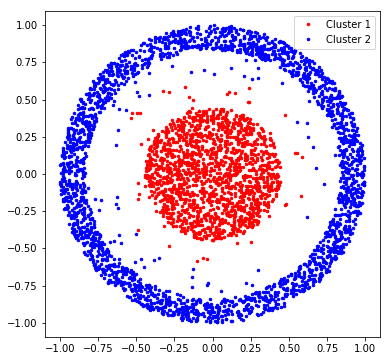

In [3]:
# Uncomment following two line and choose proper parameters
k_in_knn_graph = 100
threshold = 0.25

# begin answer
# end answer

# implement knn_graph in knn_graph.py
from knn_graph import knn_graph

W = knn_graph(X, k_in_knn_graph, threshold)
# implement spectral in spectral
from spectral import spectral
idx = spectral(W, 2)

cluster_plot(X, idx)

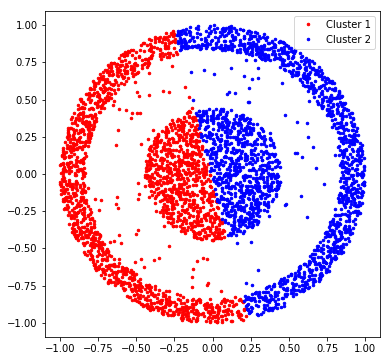

In [4]:
from kmeans import kmeans

idx = kmeans(X, 2)
cluster_plot(X, idx)

## Let's try Spectral Clustering on real-world data!

In [5]:
TDT2_data = sio.loadmat('TDT2_data.mat')
fea = TDT2_data['fea']
gnd = TDT2_data['gnd'].reshape(-1)

In [6]:
from constructW import constructW
from bestMap import bestMap
from MutualInfo import MutualInfo
from kmeans import kmeans
from spectral import spectral
# YOUR CODE HERE
n = fea.shape[0]
# begin answer
repeat = 50
acc_kmeans = 0
acc_spe = 0
nor_kmeans = 0
nor_spe = 0

for i in range(repeat):
    idx = kmeans(np.array(fea.todense()), 5)
    idx = bestMap(gnd, idx)
    nor_kmeans += MutualInfo(idx, gnd)
    acc_kmeans += np.sum(idx == gnd) / n
    
    W = constructW(np.array(fea.todense()))
    
    idx = spectral(np.array(W.todense()), 5)
    idx = bestMap(gnd, idx)
    nor_spe += MutualInfo(idx, gnd)
    acc_spe += np.sum(idx == gnd) / n
    
acc_kmeans /= repeat
acc_spe /= repeat
nor_kmeans /= repeat
nor_spe /= repeat

print('The accuracy of kmeans is ', acc_kmeans)
print('The accuracy of spectral is ', acc_spe)
print('The normalized mutual information of kmeans is ', nor_kmeans)
print('The normalized mutual information of spectral is ', nor_spe)
    
# end answer

The accuracy of kmeans is  0.5115845337376802
The accuracy of spectral is  0.6870962850644428
The normalized mutual information of kmeans is  0.3422989739091934
The normalized mutual information of spectral is  0.5953853798850107
